### Приоритизация гипотез. Анализ A/B теста.

Описание проекта <br/>
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.<br/>
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.<br/>
<br/>В данном исследовании представлены 3 файла с данными:<br/>
1-й - таблица с параметрами для каждой из 9 гипотез.<br/>
2-й - таблица с заказами для обеих тестируемых групп, перечислены дата заказа, id заказа, id покупателя, выручка с заказа.<br/>
3-й - таблица  о посещении сайта для обеих групп, перечислены дата посещения, кол-во посетителей на конкретную дату.<br/>

### Задача:
1. приоритизировать гипотезы по 2-м фреймворкам (ICE\RICE)<br/>
2. проанализировать результаты A/B теста на предмет увеличения выручки


### Часть 1. Приоритизация гипотез.
<a href='#a'>Приоритизация гипотез. </a>
### Часть 2. Анализ A/B-теста
<a href='#b'>Анализ A/B-теста </a>
1. <a href='#1'>Расчет кумулятивной выручки в динамике. </a> 
2. <a href='#2'>Расчет кумулятивного среднего чека в динамике. </a> 
3. <a href='#3'>Расчет относительного изменения кумулятивного среднего чека группы B к группе A. </a> 
4. <a href='#4'>Расчет кумулятивной конверсии по группам. </a>
5. <a href='#5'>Расчет относительного изменения кумулятивной конверсии группы B к группе A. </a> 
6. <a href='#6'>Расчет количества заказов по пользователям. </a> 
7. <a href='#7'>95-й и 99-й перцентили количества заказов на пользователя.  </a> 
8. <a href='#8'>Точечный график стоимостей заказов.   </a> 
9. <a href='#9'>95-й и 99-й перцентили стоимости заказов. </a> 
10. <a href='#10'>Расчет статистической значимости различий в конверсии между группами по «сырым» данным.  </a> 
11. <a href='#11'>Расчет статистической значимости различий в среднем чеке между группами по «сырым» данным. </a> 
12. <a href='#12'>Расчет статистической значимости различий в конверсии между группами по «очищенным» данным.  </a> 
13. <a href='#13'>Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.  </a> 

 
### Часть 3. Вывод
<a href='#14'>Общий вывод </a>


### Часть 1. Приоритизация гипотез. <a id='a'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
from scipy import stats as st
import scipy.stats as stats


In [2]:
data = pd.read_csv("/datasets/hypothesis.csv")

In [3]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
data['ice'] = data['Impact'] * data['Confidence'] / data['Efforts']
data[['Hypothesis', 'ice']].sort_values(by='ice', ascending=False)

# считаем фреймворк ICE

,Hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


In [5]:
data['rice'] = data['Reach'] * data['Impact'] * data['Confidence'] / data['Efforts']
data[['Hypothesis', 'rice']].sort_values(by='rice', ascending=False)

# счиатем RICE

,Hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


In [6]:
data.Hypothesis[7], data.Hypothesis[2], data.Hypothesis[0], data.Hypothesis[6]

('Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию')

In [7]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2


Text(0, 0.5, 'Гипотеза')

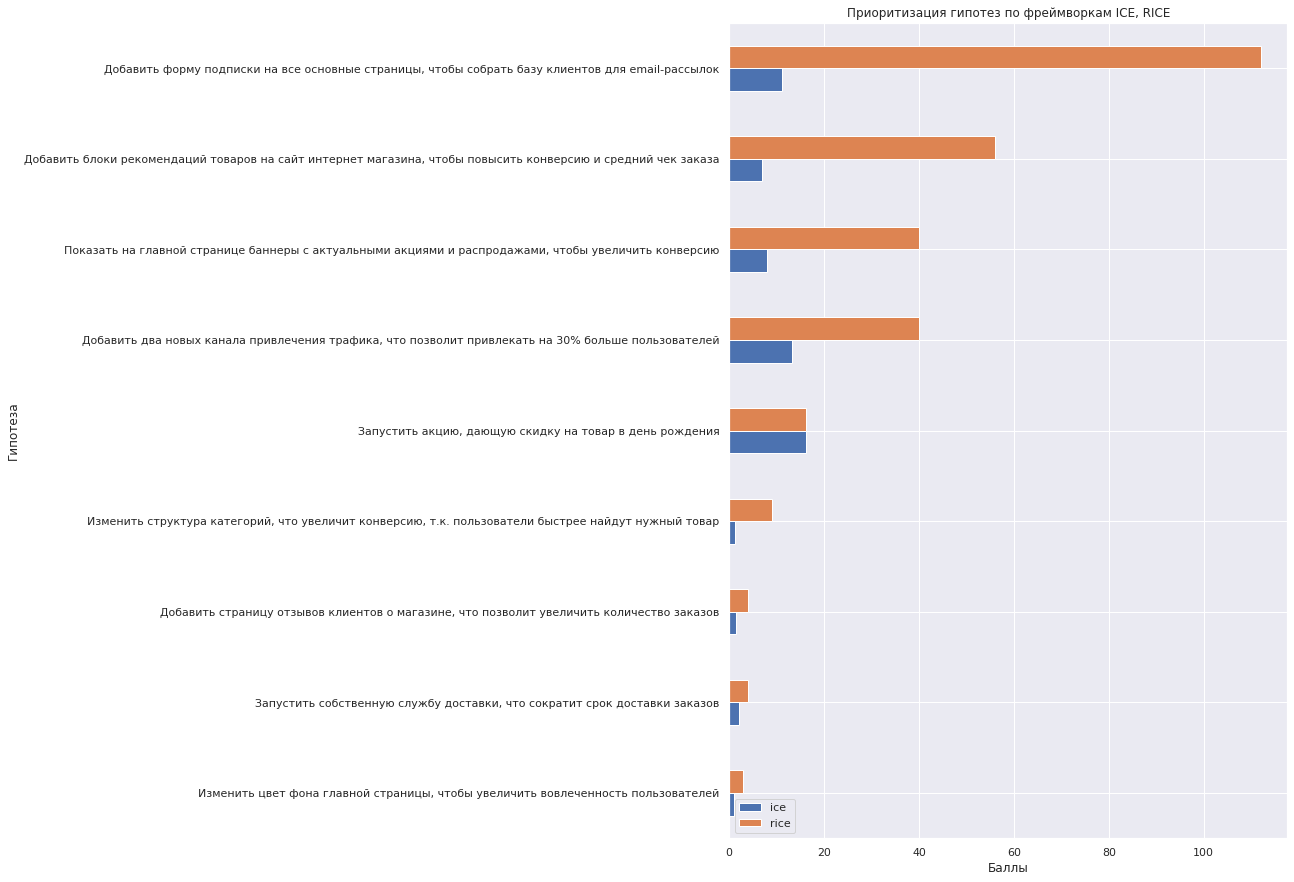

In [8]:
data.sort_values(by='rice').plot(y=['ice', 'rice'], kind='barh', x='Hypothesis', figsize=(10,15))
plt.title('Приоритизация гипотез по фреймворкам ICE, RICE')
plt.xlabel('Баллы')
plt.ylabel('Гипотеза')

#### Краткий вывод
Приоритизация гипотез выглядит другим образом, т.к. параметр "Reach" помимо прочего учитывает охват потенциальной аудитории\пользователей. <br/> Поэтому нижеуказанные гипотезы стали приоритетнее:<br/>
- №7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок<br/>
- №2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа<br/>
- №0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

А самая приоритетная гипотеза, рассчитанная по параметру "Ice", охватывает значительно меньшую долю пользователей:<br/>
- №8 - Запустить акцию, дающую скидку на товар в день рождения

### Часть 2. Анализ A/B-теста <a id='b'></a>

In [9]:
orders = pd.read_csv('/datasets/orders.csv')

In [10]:
orders.sample(2)

,transactionId,visitorId,date,revenue,group
380,1177690313,2458001652,2019-08-25,2385,B
485,858446481,517094627,2019-08-19,390,A


In [11]:
orders.info() 
# пропусков нет, дата в формате object - следует заменить

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
orders['date'] = pd.to_datetime(orders['date'], format="%Y-%m-%d")
# Замена формата даты

In [13]:
orders.sample(2) # проверка

,transactionId,visitorId,date,revenue,group
221,1731035177,2771749575,2019-08-23,1140,A
1139,837624130,755881835,2019-08-13,1253,A


In [14]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [15]:
visitors.sample(2)

,date,group,visitors
59,2019-08-29,B,531
7,2019-08-08,A,610


In [16]:
visitors.info() # пропусков нет,то же самое с датой

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
visitors['date'] = pd.to_datetime(visitors['date'], format="%Y-%m-%d")
# замена формата даты

In [18]:
orders[orders['group'] == 'A']['visitorId'].duplicated().sum()

54

In [19]:
orders[orders['group'] == 'B']['visitorId'].duplicated().sum()

54

In [20]:
orders['visitorId'].duplicated().sum()

166

В группах А и В - по 54 дубликата, в общей таблице 166 дубликатов. 166 - 54 * 2 = 58,
т.е. 58 id попали в обе группы

In [21]:
orders.sample(2) # проверка

,transactionId,visitorId,date,revenue,group
1035,2898835960,3972127743,2019-08-09,8439,A
510,2092376102,1879028067,2019-08-06,1910,B


#### Краткий вывод
В таблицах visitors, orders пропущенных значений не обнаружено, заменен формат даты для последующей работы с ней

### 1. Расчет кумулятивной выручки в динамике. <a id='1'></a>

In [22]:
orders_agg = orders.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                    orders['group'] == x['group'])].\
agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date', 'group'])

# создание файла с накопительным числом заказов и выручки

In [23]:
orders_agg = orders_agg.drop_duplicates()
#удалим дубликаты

In [24]:
orders_agg

,date,group,transactionId,revenue
55,2019-08-01,A,24,148579
66,2019-08-01,B,21,101217
175,2019-08-02,A,44,242401
173,2019-08-02,B,45,266748
291,2019-08-03,A,68,354874
...,...,...,...,...
496,2019-08-29,B,596,5559398
730,2019-08-30,A,545,4022970
690,2019-08-30,B,620,5774631
958,2019-08-31,A,557,4084803


(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

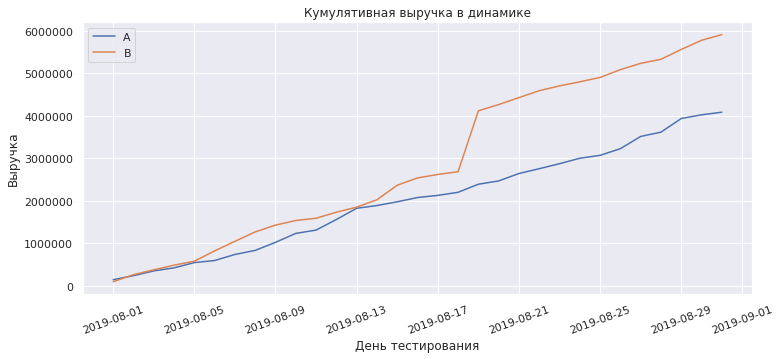

In [25]:
plt.figure(figsize=(12,5))
plt.plot(orders_agg[orders_agg['group']=='A']['date'],
         orders_agg[orders_agg['group']=='A']['revenue'], label='A')

plt.plot(orders_agg[orders_agg['group']=='B']['date'], 
         orders_agg[orders_agg['group']=='B']['revenue'], label='B')
plt.legend()
plt.title('Кумулятивная выручка в динамике')
plt.xlabel('День тестирования')
plt.ylabel('Выручка')
plt.xticks(rotation=20)

# визуализация накопительной выручки в динамике

#### Краткий вывод
Выручка равномерно росла росла в обеих группах до 17-18 августа, в эти дни выручка группы В резко вырвалась вперед и затем с такой же равномерной скоростью продолжила идти вверх, как и прежде.<br/>
Причина скорее всего проста - в эти дни кто-то из пользователей, попавших в группу В, совершил очень крупный заказ

### 2. Расчет кумулятивного среднего чека в динамике. <a id='2'></a>

(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

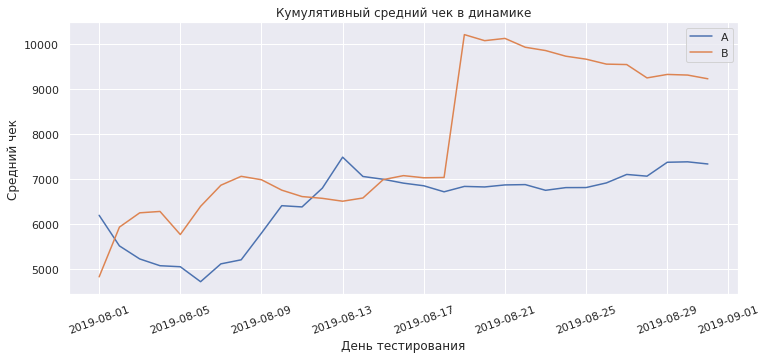

In [26]:
plt.figure(figsize=(12,5))
plt.plot(orders_agg[orders_agg['group']=='A']['date'],
         orders_agg[orders_agg['group']=='A']['revenue'] 
         / orders_agg[orders_agg['group']=='A']['transactionId'], label='A')

plt.plot(orders_agg[orders_agg['group']=='B']['date'], 
         orders_agg[orders_agg['group']=='B']['revenue']
         / orders_agg[orders_agg['group']=='B']['transactionId'], label='B')
plt.legend()
plt.title('Кумулятивный средний чек в динамике')
plt.xlabel('День тестирования')
plt.ylabel('Средний чек')
plt.xticks(rotation=20)

# визуализация накопительного среднего чека в динамике 
# (накопитльная выручка по дням делится на накопительное число заказов по дням)

#### Краткий вывод
Почти с самого начала теста группа В показывает намнго выше средний чек - возможно в группу А попадали мелкие заказы, а в группу В наоборот.<br/>
Средний чек группы А равновесно приближается к 7500 единицам, а средний чек группы В после резкого всплеска 17-18 августа приближается уже к уровню 9300.<br/>
Как и с выручкой выше причина такой большой разницы заключается в отдельных, крупных заказах в эти дни и, возможно, в первые дни теста тоже

### 3. Расчет относительного изменения кумулятивного среднего чека группы B к группе A. <a id='3'></a>

In [27]:
cum_rev_a = orders_agg[orders_agg['group']=='A']

cum_rev_b = orders_agg[orders_agg['group']=='B']

# разбиваем файл с накпиотельнымичислами по группам

In [28]:
cum_rev = cum_rev_a.merge(cum_rev_b, on='date', how='left', suffixes=['A','B'])
# мерджим в общий файл

In [29]:
cum_rev.head()

,date,groupA,transactionIdA,revenueA,groupB,transactionIdB,revenueB
0,2019-08-01,A,24,148579,B,21,101217
1,2019-08-02,A,44,242401,B,45,266748
2,2019-08-03,A,68,354874,B,61,380996
3,2019-08-04,A,84,425699,B,78,489567
4,2019-08-05,A,109,549917,B,101,581995


In [30]:
orders_agg.head() # вроде все верно

,date,group,transactionId,revenue
55,2019-08-01,A,24,148579
66,2019-08-01,B,21,101217
175,2019-08-02,A,44,242401
173,2019-08-02,B,45,266748
291,2019-08-03,A,68,354874


In [31]:
cum_rev['revenueA'].sum() /cum_rev['transactionIdA'].sum()

6799.7641131216815

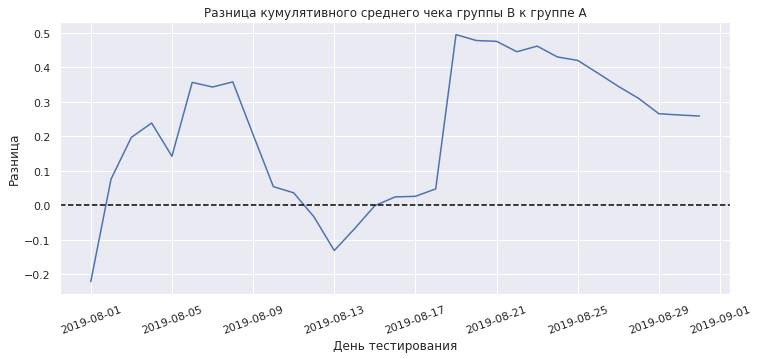

In [32]:
plt.figure(figsize=(12,5))
plt.plot(cum_rev['date'],
         (cum_rev['revenueB']/cum_rev['transactionIdB'])/
         (cum_rev['revenueA']/cum_rev['transactionIdA']) -1)


plt.title('Разница кумулятивного среднего чека группы В к группе А')
plt.xlabel('День тестирования')
plt.ylabel('Разница')
plt.xticks(rotation=20)
#plt.axis(['2019-08-01','2019-08-31',0.5, 1.6])
plt.axhline(y=0, color='black', linestyle='--') 

# визуализация накопительного среднего чека в динамике

#### Краткий вывод
на графике видны участки резкого роста среднего чека в группе В. <br/>
Есть участок в самом начале теста и участок после 17-18 августа. <br/>
Разница к концу теста стабилизируется на достаточно высоком уровне - ~ 20%

### 4. Расчет кумулятивной конверсии по группам. <a id='4'></a>

In [33]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [34]:
visit_agg = visitors.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                    visitors['group'] == x['group'])].\
agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date', 'group'])

# файл с кумулятивным числом посетителей по дням

In [35]:
visit_agg.head()

,date,group,visitors
0,2019-08-01,A,719
31,2019-08-01,B,713
1,2019-08-02,A,1338
32,2019-08-02,B,1294
2,2019-08-03,A,1845


In [36]:
orders_agg.head()

,date,group,transactionId,revenue
55,2019-08-01,A,24,148579
66,2019-08-01,B,21,101217
175,2019-08-02,A,44,242401
173,2019-08-02,B,45,266748
291,2019-08-03,A,68,354874


In [37]:
cum_data = orders_agg.merge(visit_agg, on=['date', 'group'])

In [38]:
cum_data.head()

,date,group,transactionId,revenue,visitors
0,2019-08-01,A,24,148579,719
1,2019-08-01,B,21,101217,713
2,2019-08-02,A,44,242401,1338
3,2019-08-02,B,45,266748,1294
4,2019-08-03,A,68,354874,1845


In [39]:
cum_data['conversion'] = cum_data['transactionId'] / cum_data['visitors']

# накопительная конверсия для каждого дня

Text(0, 0.5, 'Конверсия')

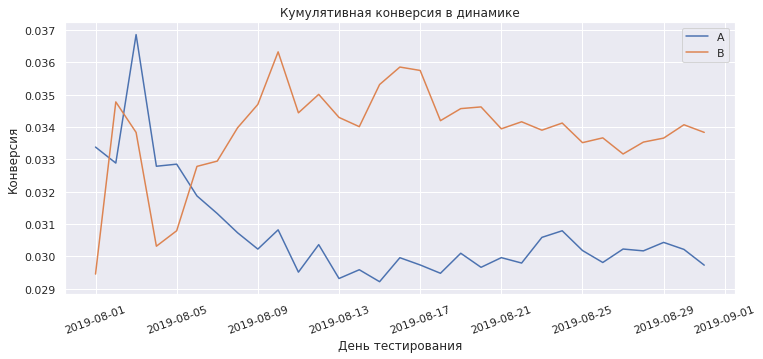

In [40]:
plt.figure(figsize=(12,5))
plt.plot(cum_data[cum_data['group']=='A']['date'], 
         cum_data[cum_data['group']=='A']['conversion'], label='A')

plt.plot(cum_data[cum_data['group']=='B']['date'], 
         cum_data[cum_data['group']=='B']['conversion'], label='B')

plt.legend()
plt.xticks(rotation=20)
plt.title('Кумулятивная конверсия в динамике')
plt.xlabel('День тестирования')
plt.ylabel('Конверсия')

# визаулизация кумулятивной конверсии по дням

#### Краткий вывод
До 5-6 августа конверсия группы А была в среднем выше, затем группа В показывает стремительный рост и вплоть до конца теста значительно опережает конверсию группы В. <br/>
Группа А равновесно близка к 3% <br/>
Группа В - к 3.4%

### 5. Расчет относительного изменения кумулятивной конверсии группы B к группе A. <a id='5'></a>

In [41]:
cum_data_a = cum_data[cum_data['group'] == 'A']

cum_data_b = cum_data[cum_data['group'] == 'B']

# разбивка по группам

In [42]:
cum_data_conv = cum_data_a.merge(cum_data_b, on='date', how='left', suffixes=['A', 'B'])

In [43]:
cum_data_conv.head()

,date,groupA,transactionIdA,revenueA,visitorsA,conversionA,groupB,transactionIdB,revenueB,visitorsB,conversionB
0,2019-08-01,A,24,148579,719,0.033380,B,21,101217,713,0.029453
1,2019-08-02,A,44,242401,1338,0.032885,B,45,266748,1294,0.034776
2,2019-08-03,A,68,354874,1845,0.036856,B,61,380996,1803,0.033833
3,2019-08-04,A,84,425699,2562,0.032787,B,78,489567,2573,0.030315
4,2019-08-05,A,109,549917,3318,0.032851,B,101,581995,3280,0.030793


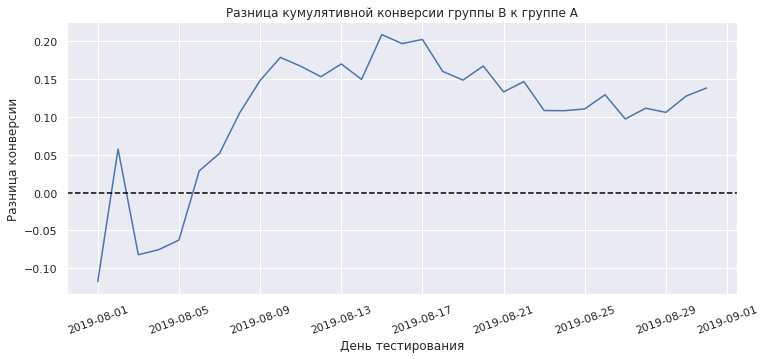

In [44]:
plt.figure(figsize=(12,5))
plt.plot(cum_data_conv['date'], (cum_data_conv['conversionB'] / cum_data_conv['conversionA']) - 1)


plt.xticks(rotation=20)
plt.title('Разница кумулятивной конверсии группы В к группе А')
plt.xlabel('День тестирования')
plt.ylabel('Разница конверсии')
plt.axhline(y=0, color='black', linestyle='--')

# визаулизация относительной разницы конверсий

#### Краткий вывод
В начале теста у группы А результат был получше, но после 8 августа группа В показывает рост и до конца теста разница конверсий составляет  >10%

### 6. Расчет количества заказов по пользователям. <a id='6'></a>

In [45]:
orders.sample(2)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1124,86504917,3598591418,2019-08-13,6780,A


In [46]:
orders_by_users = orders.groupby('visitorId').agg({'transactionId' : 'nunique'})\
.reset_index().sort_values(by='transactionId', ascending=False)

# расчет числа заказов на каждого покупателя

In [47]:
orders_by_users.columns = ['visitorId', 'orders']
orders_by_users.head()

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Text(0, 0.5, 'Частота')

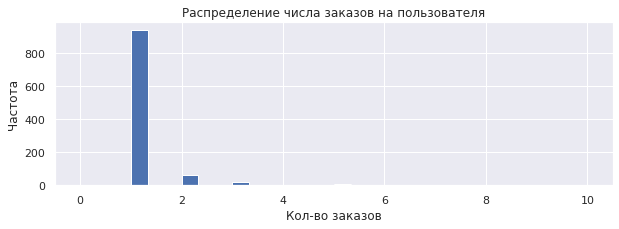

In [48]:
orders_by_users.orders.hist(figsize=(10,3), bins=30, range=(0,10))
plt.xlabel('Кол-во заказов')
plt.title('Распределение числа заказов на пользователя')
plt.ylabel('Частота')

Text(0, 0.5, 'Число заказов')

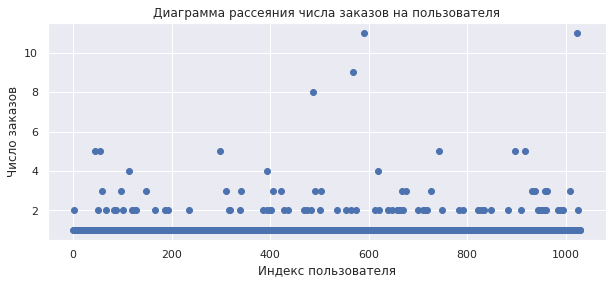

In [49]:
plt.figure(figsize=(10,4))
plt.scatter(orders_by_users.index, orders_by_users['orders'])

plt.xlabel('Индекс пользователя')
plt.title('Диаграмма рассеяния числа заказов на пользователя')
plt.ylabel('Число заказов')

#### Краткий вывод
Судя по графикам больше 3х заказов можно смело считать выбросами

### 7. Расчет 95-го и 99-го перцентилей количества заказов на пользователя. <a id='7'></a>

In [50]:
np.percentile(orders_by_users['orders'], [95,99])

array([2., 4.])

95й перцентиль = 2 заказам на пользователя <br/>
99й перцентиль = 4 заказам <br/>
Возьмем граниицу отсечения >3 заказов

### 8. График стоимостей заказов. <a id='8'></a>

Text(0, 0.5, 'Частота')

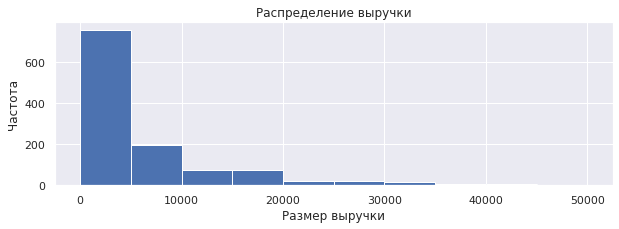

In [51]:
orders['revenue'].hist(range=(0,50000), figsize=(10,3))
plt.xlabel('Размер выручки')
plt.title('Распределение выручки')
plt.ylabel('Частота')

Выручка свыше 20 000 встречается достаточно редко, можно сделать отсечение по этому значению

Text(0, 0.5, 'Размер выручки')

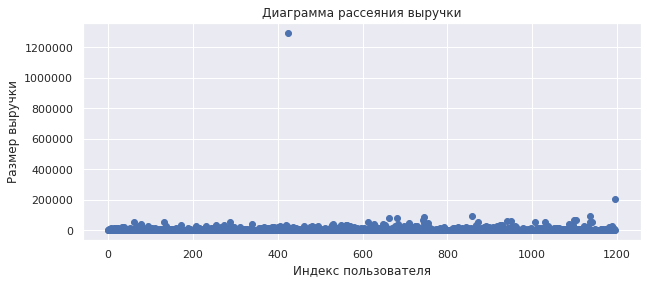

In [52]:
plt.figure(figsize=(10,4))
plt.scatter(orders.index, orders['revenue'])

plt.xlabel('Индекс пользователя')
plt.title('Диаграмма рассеяния выручки')
plt.ylabel('Размер выручки')

### 9. Расчет 95-го и 99-го перцентилей стоимости заказов.  <a id='9'></a>

In [53]:
np.percentile(orders['revenue'], [95,99])

array([28000. , 58233.2])

95й перцентиль = 28 000 <br/>
99й перцентиль = 58 233 <br/>
Возьмем граниицу отсечения по 95 перцентилю, > 28 000

### 10. Расчет статистической значимости различий в конверсии между группами по «сырым» данным.  <a id='10'></a>

In [54]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [55]:
visit_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visit_a.columns = ['date','vis_per_date_a']


visit_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visit_b.columns = ['date','vis_per_date_b']

# создаем таблицы с числом посетителей на каждую дату теста

In [56]:
visit_a.head(2),visit_b.head(2)

(        date  vis_per_date_a
 0 2019-08-01             719
 1 2019-08-02             619,
          date  vis_per_date_b
 31 2019-08-01             713
 32 2019-08-02             581)

In [57]:
visit_cum_a = visit_a.apply(lambda x: visit_a[visit_a['date'] <= x['date']]\
.agg({'date' : 'max','vis_per_date_a' : "sum" }), axis=1)\
      .sort_values(by='date')

visit_cum_a.columns = ['date', 'cum_vis_per_date_a']

# создаем таблицу с накопительным числом посетителей на каждую дату теста

In [58]:
visit_cum_a.head(2)

,date,cum_vis_per_date_a
0,2019-08-01,719
1,2019-08-02,1338


In [59]:
visit_cum_b = visit_b.apply(lambda x: visit_b[visit_b['date'] <= x['date']]\
.agg({'date' : 'max','vis_per_date_b' : "sum" }), axis=1)\
      .sort_values(by='date')

visit_cum_b.columns = ['date', 'cum_vis_per_date_b']

# создаем таблицу с накопительным числом посетителей на каждую дату теста

In [60]:
visit_cum_b.head(2)

,date,cum_vis_per_date_b
31,2019-08-01,713
32,2019-08-02,1294


In [61]:
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


In [62]:
orders_a = orders[orders['group'] == 'A'][['transactionId', 'visitorId', 'date', 'revenue']].\
groupby('date', as_index=False).agg({'transactionId' : 'nunique', 'revenue' : 'sum'})

orders_a.columns= ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_b = orders[orders['group'] == 'B'][['transactionId', 'visitorId', 'date', 'revenue']].\
groupby('date', as_index=False).agg({'transactionId' : 'nunique', 'revenue' : 'sum'})

orders_b.columns= ['date', 'orders_per_date_b', 'revenue_per_date_b']


# создаем таблицы с числом заказов и выручкой на каждую дату теста

In [63]:
orders_a.head(2), orders_b.head(2)

(        date  orders_per_date_a  revenue_per_date_a
 0 2019-08-01                 24              148579
 1 2019-08-02                 20               93822,
         date  orders_per_date_b  revenue_per_date_b
 0 2019-08-01                 21              101217
 1 2019-08-02                 24              165531)

In [64]:
orders_cum_a = orders_a.apply(lambda x: orders_a[orders_a['date'] <= x['date']]\
    .agg({'date' : 'max', 'orders_per_date_a' : 'sum', 'revenue_per_date_a' : 'sum'}), axis=1)\
      .sort_values(by='date')

orders_cum_a.columns = ['date', 'cum_orders_per_date_a', 'cum_revenue_per_date_a']

# создаем таблицу с накопительным числом заказов и выручкой на каждую дату теста

In [65]:
orders_cum_a.tail(2)

,date,cum_orders_per_date_a,cum_revenue_per_date_a
29,2019-08-30,545,4022970
30,2019-08-31,557,4084803


In [66]:
orders_cum_b = orders_b.apply(lambda x: orders_b[orders_b['date'] <= x['date']]\
    .agg({'date' : 'max', 'orders_per_date_b' : 'sum', 'revenue_per_date_b' : 'sum'}), axis=1)\
      .sort_values(by='date')

orders_cum_b.columns = ['date', 'cum_orders_per_date_b', 'cum_revenue_per_date_b']


# создаем таблицу с накопительным числом заказов и выручкой на каждую дату теста

In [67]:
orders_cum_b.tail(2)

,date,cum_orders_per_date_b,cum_revenue_per_date_b
29,2019-08-30,620,5774631
30,2019-08-31,640,5907760


In [68]:
table = orders_a.merge(orders_b, on='date', how='left')\
.merge(orders_cum_a,  on='date', how='left')\
.merge(orders_cum_b,  on='date', how='left')\
.merge(visit_a,  on='date', how='left')\
.merge(visit_b,  on='date', how='left')\
.merge(visit_cum_a,  on='date', how='left')\
.merge(visit_cum_b,  on='date', how='left')

# мерджим в общий большой файл все данные по дням + накпоительные

In [69]:
table.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,cum_orders_per_date_a,cum_revenue_per_date_a,cum_orders_per_date_b,cum_revenue_per_date_b,vis_per_date_a,vis_per_date_b,cum_vis_per_date_a,cum_vis_per_date_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [70]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [71]:
orders_by_users_a = orders[orders['group'] == 'A'].groupby('visitorId')\
.agg({'transactionId' : 'nunique'}).reset_index()

orders_by_users_a.columns = ['visitorId', 'orders']

orders_by_users_a.head(2)

# посчитаем кол-во заказов для каждого польз-ля из группы А

,visitorId,orders
0,8300375,1
1,11685486,1


In [72]:
orders_by_users_b = orders[orders['group'] == 'B'].groupby('visitorId')\
.agg({'transactionId' : 'nunique'}).reset_index()

orders_by_users_b.columns = ['visitorId', 'orders']


orders_by_users_b.head(2)
# посчитаем кол-во заказов для каждого польз-ля из группы В

,visitorId,orders
0,5114589,1
1,6958315,1


In [73]:
table.head(1)

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,cum_orders_per_date_a,cum_revenue_per_date_a,cum_orders_per_date_b,cum_revenue_per_date_b,vis_per_date_a,vis_per_date_b,cum_vis_per_date_a,cum_vis_per_date_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713


In [74]:
orders_by_users_a

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [75]:
sample_a = pd.concat([orders_by_users_a['orders'], 
pd.Series(0, np.arange(table['vis_per_date_a'].sum() - len(orders_by_users_a['orders'])), 
          name='orders')], axis=0)

sample_a

# список из числа заказов для каждого покупателя + нули для остальных посетителей из группы А

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

In [76]:
sample_b = pd.concat([orders_by_users_b['orders'], 
pd.Series(0, np.arange(table['vis_per_date_b'].sum() - len(orders_by_users_b['orders'])),
          name='orders')], axis=0)

sample_b

# список из числа заказов для каждого покупателя + нули для остальных посетителей из группы В

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64

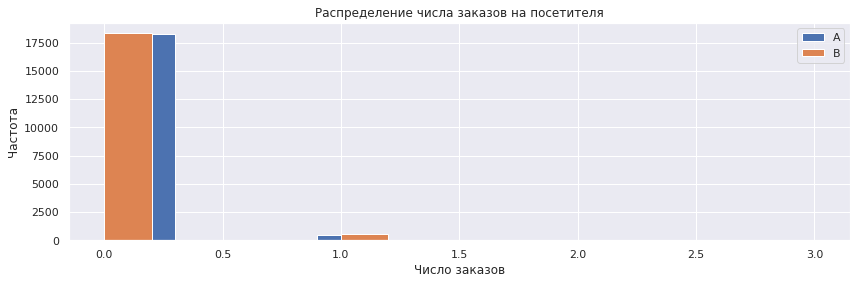

In [77]:
plt.figure(figsize=(14,4))
sample_a.hist(range=(0,3),label='A'),
sample_b.hist(range=(0,2), label='B')
plt.xlabel('Число заказов')
plt.ylabel('Частота')
plt.title('Распределение числа заказов на посетителя')
plt.legend()

#### Распределения выглядят ненормальными, поэтому применим критерий Манна-Уитни для проверки гипотезы о равенстве конверсий в обеих группах. <br/>
Нулевая гипотеза Н0 - конверсии в обеих группах равны и никаких статистически значимых разлиий между ними нет <br/>
Альтернативная гипотеза Н1 - в конверсиях между группами есть значимые различия

In [78]:
res_conv = stats.mannwhitneyu(sample_a, sample_b)
print('p_value:', "{:.5f}".format(res_conv[1]))
print('')
print('Относительная разница средних конверсий - группы В к группе А равна:', 
      "{:.1%}".format(sample_b.mean()/sample_a.mean() - 1))


p_value: 0.00840

Относительная разница средних конверсий - группы В к группе А равна: 13.8%


#### Краткий вывод
1. p_value < 0.05, следовательно, есть основания отвергнуть нулевую гипотезу и заявить, что есть статистически значимые различия между конверсиями в группах А и В
2. Средняя конверсия группы В на 13.8% выше средней конверсии в группе А

### 11. Расчет статистической значимости различий в среднем чеке между группами по «сырым» данным. <a id='11'></a>

In [79]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


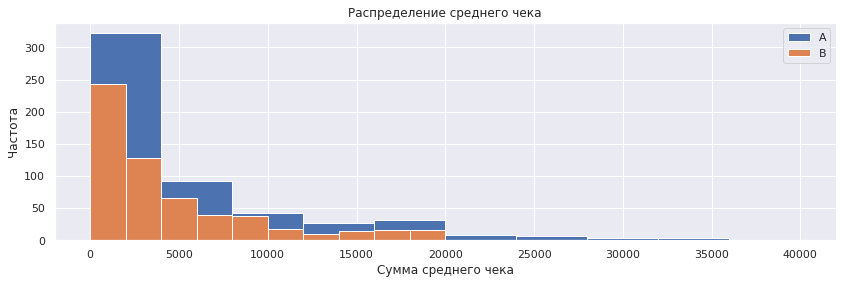

In [80]:
plt.figure(figsize=(14,4))
orders[orders['group']=='A']['revenue'].hist(range=(0,40000), label='A'),
orders[orders['group']=='B']['revenue'].hist(range=(0,20000),label='B')

plt.xlabel('Сумма среднего чека')
plt.ylabel('Частота')
plt.title('Распределение среднего чека')
plt.legend()

#### Применим тест Шапиро на проверку нормальности распределения

In [81]:
resultsa = st.shapiro(orders[orders['group']=='A']['revenue'])
resultsb = st.shapiro(orders[orders['group']=='B']['revenue'])

In [82]:
p_valuea = resultsa[1]
p_valueb = resultsb[1]


In [83]:
p_valuea < 0.05, p_valueb < 0.05

(True, True)

#### Распределения выглядят ненормальными, Тест Шапиро подтверждает это, поэтому применим критерий Манна_Уитни для проверки гипотезы о равенстве среднего чека в обеих группах. <br/>
Нулевая гипотеза Н0 - средние чеки в обеих группах равны и никаких статистически значимых разлиий между ними нет <br/>
Альтернатинвая гипотеза Н1 - средние чеки в группах статистически отличаются друг от друга

In [84]:
res_mean_rev = stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'],orders[orders['group']=='B']['revenue']
)
print('p_value:', "{:.5f}".format(res_mean_rev[1]))
print('')
print('Относительная разница среднего чека группы В к группе А равна:', 
      "{:.1%}".format(orders[orders['group']=='B']['revenue'].mean()/
                      orders[orders['group']=='A']['revenue'].mean() - 1))
print('')

print('Относительная разница медианного чека группы В к группе А равна:', 
      "{:.1%}".format(orders[orders['group']=='B']['revenue'].median()/
                      orders[orders['group']=='A']['revenue'].median() - 1))

p_value: 0.36465

Относительная разница среднего чека группы В к группе А равна: 25.9%

Относительная разница медианного чека группы В к группе А равна: -1.2%


#### Краткий вывод
1. p_value > 0.05, следовательно, нет основания отвергнуть нулевую гипотезу о равенстве средних чеков в обеих группах.
2. Средний чек группы В на 25.9% выше среднего чека группы А
3. Медианное значение выручки группы В на 1.2% ниже, чем в группе А 

### 12. Расчет статистической значимости различий в конверсии между группами по «очищенным» данным. <a id='12'></a>

In [85]:
orders_by_users_a[orders_by_users_a['orders'] > 3]['visitorId']

# отберем из каждой группы юзеров, у которых > 3 заказов, как мы решили выше

18      199603092
23      237748145
227    2038680547
269    2378935119
278    2458001652
499    4256040402
Name: visitorId, dtype: int64

In [86]:
orders_by_users_b[orders_by_users_b['orders'] > 3]['visitorId']

326    2378935119
340    2458001652
424    3062433592
501    3717692402
514    3803269165
580    4256040402
Name: visitorId, dtype: int64

In [87]:
orders[orders['revenue'] > 28000 ]['visitorId'].head()

# отберем выручку > 28 000 - это 95й перцентиль

60     4256040402
73     2947100995
77      787824685
78     3288820196
131    2254586615
Name: visitorId, dtype: int64

In [88]:
len(orders[orders['revenue'] > 28000 ]['visitorId']) \
+ len(orders_by_users_a[orders_by_users_a['orders'] > 3]['visitorId'])\
+ len(orders_by_users_b[orders_by_users_b['orders'] > 3]['visitorId'])
# сколько строк будет при объединении

72

In [89]:
excess = pd.concat([orders_by_users_a[orders_by_users_a['orders'] > 3]['visitorId'],
                  orders_by_users_b[orders_by_users_b['orders'] > 3]['visitorId'],
                  orders[orders['revenue'] > 28000 ]['visitorId']], axis=0)

In [90]:
len(excess) # число то же

72

In [91]:
excess = excess.drop_duplicates() # удалим дубликаты если они есть

In [92]:
excess.nunique() # 63 аномальных пользователя мы отсеим

63

In [93]:
excess

18       199603092
23       237748145
227     2038680547
269     2378935119
278     2458001652
           ...    
1136    1307669133
1137     759473111
1142    2606908679
1189     393266494
1196    2108080724
Name: visitorId, Length: 63, dtype: int64

In [94]:
sample_a_filter = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['visitorId']\
 .isin(excess))]['orders'],
    pd.Series(0,np.arange(table['vis_per_date_a'].sum() - len(orders_by_users_a['orders'])),
                 name='orders')],axis=0)


sample_a_filter

# отсеиваем id покупателей из  группы А, у которых число заказов >3

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18699, dtype: int64

In [95]:
sample_b_filter = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['visitorId']\
  .isin(excess))]['orders'],
   pd.Series(0, np.arange(table['vis_per_date_b'].sum() - len(orders_by_users_b['orders'])),
                 name='orders')],axis=0)


sample_b_filter
# отсеиваем id покупателей из  группы В, у которых число заказов >3

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18875, dtype: int64

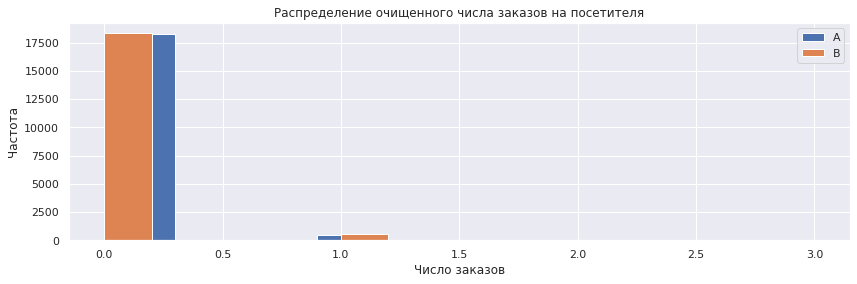

In [96]:
plt.figure(figsize=(14,4))
sample_a_filter.hist(range=(0,3),label='A'),
sample_b_filter.hist(range=(0,2), label='B')
plt.xlabel('Число заказов')
plt.ylabel('Частота')
plt.title('Распределение очищенного числа заказов на посетителя')
plt.legend()

#### Распределения выглядят ненормальными, поэтому применим критерий Манна-Уитни для проверки гипотезы о равенстве конверсий в обеих группах. <br/>
Нулевая гипотеза Н0 - конверсии в обеих группах равны и никаких статистически значимых разлиий между ними нет <br/>
Альтернативная гипотеза Н1 - в конверсиях есть значимые различия

In [97]:
res_conv_filter = stats.mannwhitneyu(sample_a_filter, sample_b_filter)
print('БЫЛО')
print('p_value:', "{:.5f}".format(res_conv[1]))
print('Относительная разница средних конверсий - группы В к группе А равна:', 
      "{:.1%}".format(sample_b.mean()/sample_a.mean() - 1))
print('')
print('СТАЛО')
print('p_value:', "{:.5f}".format(res_conv_filter[1]))
print('Относительная разница средних конверсий - группы В к группе А равна:', 
      "{:.1%}".format(sample_b_filter.mean()/sample_a_filter.mean() - 1))


БЫЛО
p_value: 0.00840
Относительная разница средних конверсий - группы В к группе А равна: 13.8%

СТАЛО
p_value: 0.00897
Относительная разница средних конверсий - группы В к группе А равна: 14.8%


#### Краткий вывод
p_value и относительная разница конверсий практически не изменились. <br/>
Снова отвергаем нулевую гипотезу и утверждаем, что после отсеивания выбросов конверсии в 2х группах статистически значимо отличаются друг от друга

### 13. Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.  <a id='13'></a>

In [98]:
orders_a_filter = orders[np.logical_and(orders['group']=="A",
        np.logical_not(orders['visitorId'].isin(excess)))]['revenue']



orders_b_filter = orders[np.logical_and(orders['group']=="B",
        np.logical_not(orders['visitorId'].isin(excess)))]['revenue']

# отсеиваем id покупателей, у которых выручка с заказов > 28 000

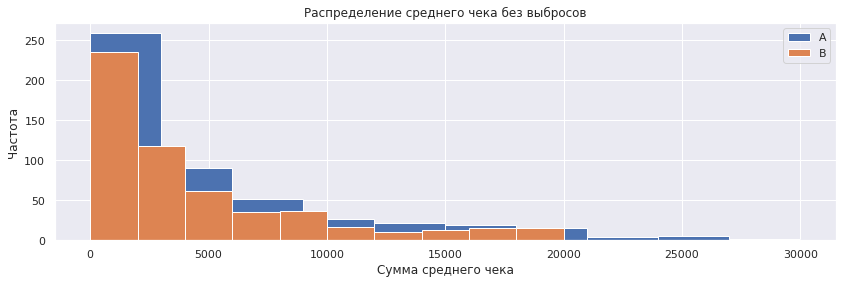

In [99]:
plt.figure(figsize=(14,4))
orders_a_filter.hist(range=(0,30000), label='A'),
orders_b_filter.hist(range=(0,20000),label='B')

plt.xlabel('Сумма среднего чека')
plt.ylabel('Частота')
plt.title('Распределение среднего чека без выбросов')
plt.legend()

#### Применим тест Шапиро на проверку нормальности распределения выручек для обеих групп

In [100]:
results_a = st.shapiro(orders_a_filter)
results_b = st.shapiro(orders_b_filter)

In [101]:
p_value_a = results_a[1]
p_value_b = results_b[1]

In [102]:
p_value_a < 0.05, p_value_b < 0.05

(True, True)

#### Распределения выглядят ненормальными, Тест Шапиро подтверждает это, поэтому применим критерий Манна_Уитни для проверки гипотезы о равенстве среднего чека в обеих группах. <br/>
Нулевая гипотеза Н0 - средние чеки\выручки в обеих группах равны и никаких статистически значимых разлиий между ними нет <br/>
Альтернативная гипотеза Н1 - средние чеки\выручки в группах статистически значимо отличаются друг от друга

In [103]:
res_mean_rev_filter = stats.mannwhitneyu(orders_a_filter, orders_b_filter)
print('БЫЛО')
print('p_value:', "{:.5f}".format(res_mean_rev[1]))
print('Относительная разница среднего чека группы В к группе А равна:', 
      "{:.1%}".format(orders[orders['group']=='B']['revenue'].mean()/
                      orders[orders['group']=='A']['revenue'].mean() - 1))

print('Относительная разница медианного чека группы В к группе А равна:', 
      "{:.1%}".format(orders[orders['group']=='B']['revenue'].median()/
                      orders[orders['group']=='A']['revenue'].median() - 1))

print('')

print('СТАЛО')
print('p_value:', "{:.5f}".format(res_mean_rev_filter[1]))

print('Относительная разница среднего чека группы В к группе А равна:', 
      "{:.1%}".format(orders_b_filter.mean()/
                      orders_a_filter.mean() - 1))

print('Относительная разница медианного чека группы В к группе А равна:', 
      "{:.1%}".format(orders_b_filter.median()/
                      orders_a_filter.median() - 1))

БЫЛО
p_value: 0.36465
Относительная разница среднего чека группы В к группе А равна: 25.9%
Относительная разница медианного чека группы В к группе А равна: -1.2%

СТАЛО
p_value: 0.48826
Относительная разница среднего чека группы В к группе А равна: -1.7%
Относительная разница медианного чека группы В к группе А равна: -1.0%


#### Краткий вывод
1. p_value увеличился, он снова > 0.05, следовательно, нет оснований отвергнуть нулевую гипотезу о равенстве средних чеков в обеих группах.<br/> Есть основание утверждать, что выручки в обеих группах равны.
2. После очищения от выбросов относительная разница среднего чека группы В к среднему чеку группы А упала с 25.9% до -1.7%
3. После очищения от выбросов относительная разница медианных средних чеков практически не изменилась

### Общий вывод <a id='14'></a>

Разница в конверсии:
1. Конверсии в обоих случаях, как по сырым данным, так и по очищенным от выбросов, статистически значимо отличаются друг от друга. 
2. Средняя конверсия группы В значительно выше значения группы А. <br/>По сырым данным разница составляет 13.8%. По очищенным данным 14.8% <br/>
<br/>

Разница в выручке:
1. Статистически значимых различий в средних чеках\выручках не обнаружены, как по сырым данным, так и по очищенным от выбросов.
2. После очистки от выбросов относительная разница среднего чека\выручки группы В к группе А
упала с 25.9% до -1.7%


#### Рекомендация по принятию решения по результатам теста:

Учитывая высокий p_value при расчете критерия Манна_Уитни в обоих случаях (по сырым данным и за вычетом выбросов) можно признать данный тест неудачным.<br/>
Следует остановить тест и зафиксировать отсутствие статистически значимых различий в выручке между группами.<br/>
Но зафиксировать статистически значимую разницу в увеличении конверсии в группе В
